# NUMERIC DATA INCELEME

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
import scipy.stats as stats 
import statsmodels.stats.api as sms
import numpy as np 
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
class Info(): 
    def __init__(self,data):
        df= pd.read_excel("data.xlsx")
        print(data.head())
        print(data.info())
        print(data.describe().T)
        print(data.shape)
        print(data.columns)
    def Num_data(self):
        print(self.data.select_dtypes(include=['float64','int64']))
    def Cat_data(self):
        print(self.data.select_dtypes(include=["object"]))
        

In [13]:
df= pd.read_excel("data.xlsx")

In [15]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [6]:
Info(data)  #veri hakkında genel bilgilerin verildiği bölüm

   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_target  90_target

In [12]:
df.shape  # data 6167 gözlem ,136 değişken içermektedir.

(6167, 136)

In [9]:
data.describe().T  #Verinin istatiksel değerlerine bakıyoruz.

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


# Visualization

In [18]:
class Visualization():
    def __init__(self,data):
        self.data = data     
    def barplot(self,x,y,z = None):
        bar = sns.barplot(x = x, y = y, hue = z, data = self.data);
        return bar   
    def catplot(self, x, y, z = None):
        cat = sns.catplot(x = x, y = y, hue = z, data = self.data);
        return cat    
    def histogram(self,x, y = None):
        hist = sns.FacetGrid(self.data, hue = y, height = 5, xlim = (0, 10000)).map(sns.kdeplot, x, shade= True).add_legend();
        return hist    
    def boxplot(self,x, y = None, z = None):
        box = sns.boxplot(x = x, y = y, hue = z, data=self.data);
        return box    
    def jointplot(self,x,y):
        joint = sns.jointplot(x = x, y = y ,data = self.data, kind = "reg");
        return joint    
    def scatter(self, x, y, z = None, s = None):
        sca = sns.scatterplot(x = x, y = y, hue=z, size = s, data = self.data);
        return sca    
    def lmplot(self, x, y, z = None, c = None, r = None):
        lm = sns.lmplot(x = x, y = y, hue = z, col = c, row = r, data = self.data);
        return lm    
    def pairplot(self, x = None):
        pair = sns.pairplot(self.data, kind = "reg", hue = x);
        return pair    
    def heatmap(self):
        heat = sns.heatmap(self.data, annot = True, fmt = "d");
        return heat     
    def lineplot(self, x, y, z = None, s = None):
        lin = sns.lineplot(x = x, y = y, hue = z, style = s, markers = True,  dashes = False, data = self.data);
        return lin    
    def countplot(self, column):
        count = sns.countplot(self.data.iloc[:,column], data = self.data, palette = "Set3");
        return count    
    def cross_tab(self,x,y):
        cross = pd.crosstab(x, y)
        return cross    

In [22]:
df.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,...,0.620106,-0.694619,-0.304134,-0.620099,0.076169,0.626439,0.817302,0.060969,0.068989,0.060428
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,...,0.634679,-0.646983,-0.279922,-0.569657,0.021220,0.567359,0.810371,0.062101,0.069652,0.061560
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.275687,-0.489596,-0.277258,-0.432579,0.144795,0.593799,0.445427,-0.004126,0.006984,-0.006650
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,...,-0.276882,0.436275,0.349318,0.505772,-0.173139,-0.631961,-0.450719,-0.031316,-0.004053,0.012093
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,...,0.333229,-0.558311,-0.377913,-0.565931,0.191752,0.739227,0.540428,0.016423,0.006654,-0.011307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,0.626439,0.567359,0.593799,-0.631961,0.739227,0.776076,0.700736,-0.066201,-0.066437,-0.051049,...,0.293592,-0.571432,-0.356302,-0.594243,0.341017,1.000000,0.584754,0.019599,0.009063,-0.002519
ind_428,0.817302,0.810371,0.445427,-0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.574646,-0.499656,-0.260048,-0.487564,0.188853,0.584754,1.000000,0.047041,0.052418,0.043563
20_target,0.060969,0.062101,-0.004126,-0.031316,0.016423,0.042550,0.041289,0.015320,0.012012,0.026881,...,0.066637,-0.029005,-0.009829,-0.045656,-0.008799,0.019599,0.047041,1.000000,0.384076,0.355950
50_target,0.068989,0.069652,0.006984,-0.004053,0.006654,0.055045,0.048302,0.072728,0.084561,0.101774,...,0.127234,0.008239,0.047728,-0.101488,-0.003372,0.009063,0.052418,0.384076,1.000000,0.940916


In [23]:
df[['20_target','50_target','90_target']].describe().T

,count,mean,std,min,25%,50%,75%,max
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694
90_target,6167.0,-3.315072,36.841541,-38.573858,-37.695273,-35.788391,37.521892,38.465649


In [24]:
cor = df.corr()["50_target"].abs()
cor

ind_5        0.068989
ind_6        0.069652
ind_8        0.006984
ind_9        0.004053
ind_10       0.006654
               ...   
ind_426      0.009063
ind_428      0.052418
20_target    0.384076
50_target    1.000000
90_target    0.940916
Name: 50_target, Length: 133, dtype: float64

In [36]:
corr = cor.nlargest(10).index
corr

Index(['50_target', '90_target', '20_target', 'ind_412', 'ind_18', 'ind_17',
       'ind_324', 'ind_332', 'ind_16', 'ind_418'],
      dtype='object')

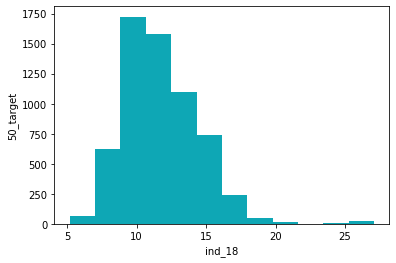

In [37]:
plt.hist(df.ind_18,bins=12,color='#0ea7b5',
         histtype="bar")

plt.xlabel("ind_18")
plt.ylabel("50_target")

plt.show()

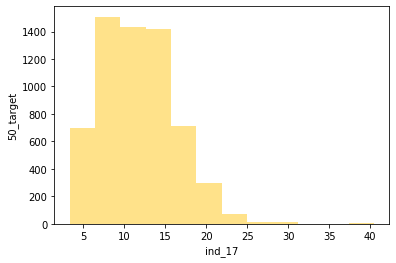

In [38]:
plt.hist(df.ind_17,bins=12,color='#ffe28a',
         histtype="bar")

plt.xlabel("ind_17")
plt.ylabel("50_target")

plt.show()

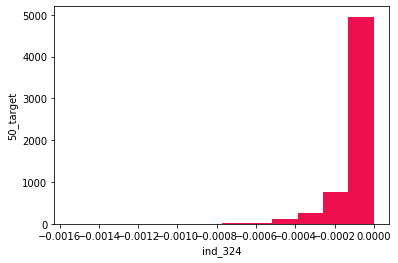

In [39]:
plt.hist(df.ind_324,bins=12,color='#ee104e',
         histtype="bar")

plt.xlabel("ind_324")
plt.ylabel("50_target")

plt.show()

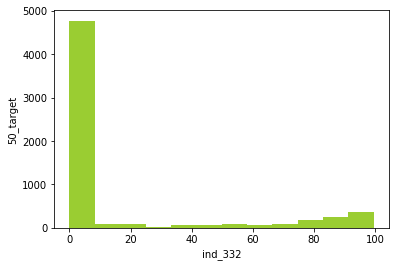

In [40]:
plt.hist(df.ind_332,bins=12,color='#9acd32',
         histtype="bar")

plt.xlabel("ind_332")
plt.ylabel("50_target")

plt.show()

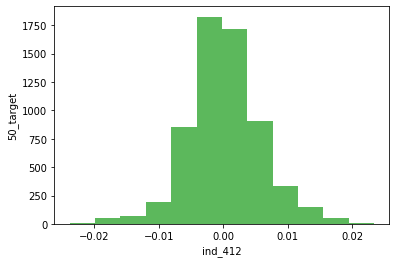

In [41]:
plt.hist(df.ind_412,bins=12,color='#5cb85c',
         histtype="bar")

plt.xlabel("ind_412")
plt.ylabel("50_target")

plt.show()

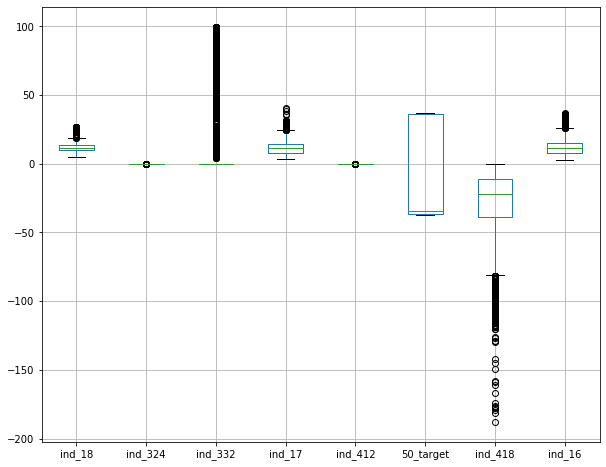

In [42]:
plt.figure(figsize=(10,8))
boxplot_df = df[["ind_18", "ind_324" , "ind_332","ind_17" , "ind_412" ,"50_target","ind_418","ind_16"]]
boxplot_df.boxplot()
plt.show()

In [45]:
new_data = df[['50_target', 'ind_412', 'ind_18', 'ind_17', 'ind_324', 'ind_332','ind_418','ind_16']]
new_data.corr()

,50_target,ind_412,ind_18,ind_17,ind_324,ind_332,ind_418,ind_16
50_target,1.000000,0.127234,0.127057,0.121097,-0.110802,0.104057,-0.101488,0.101774
ind_412,0.127234,1.000000,-0.018460,-0.036754,-0.263317,0.077782,-0.337149,-0.025170
ind_18,0.127057,-0.018460,1.000000,0.545873,-0.257567,0.160939,-0.359179,0.429029
ind_17,0.121097,-0.036754,0.545873,1.000000,-0.158633,0.064045,-0.416837,0.921295
ind_324,-0.110802,-0.263317,-0.257567,-0.158633,1.000000,-0.137205,0.400903,-0.093773
ind_332,0.104057,0.077782,0.160939,0.064045,-0.137205,1.000000,-0.152129,0.039247
ind_418,-0.101488,-0.337149,-0.359179,-0.416837,0.400903,-0.152129,1.000000,-0.362005
ind_16,0.101774,-0.025170,0.429029,0.921295,-0.093773,0.039247,-0.362005,1.000000


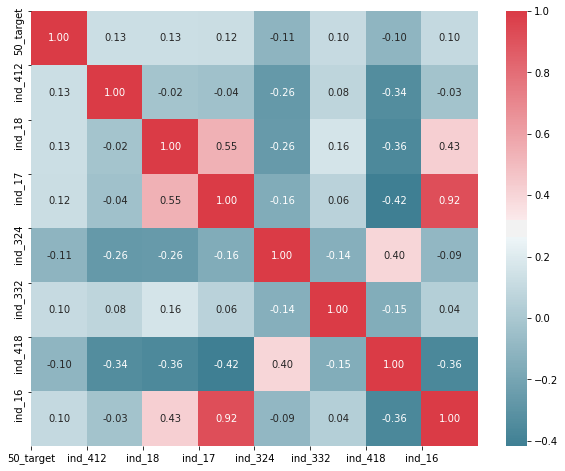

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = new_data.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

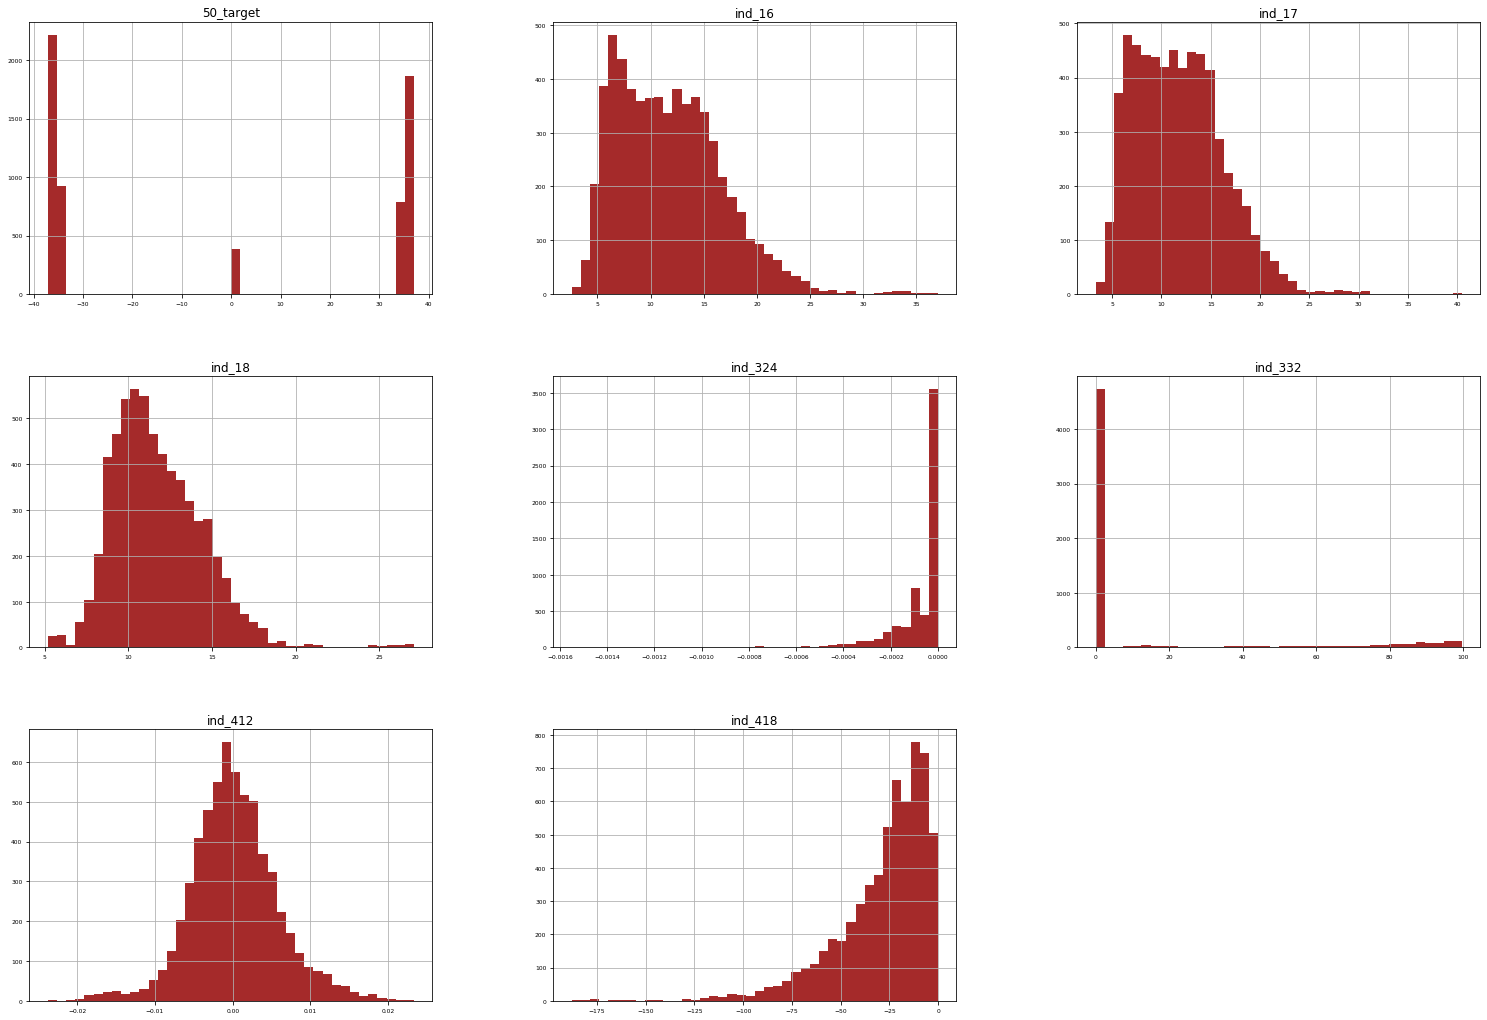

In [47]:
new_data.hist(figsize=(26,18), bins=40, xlabelsize=6, ylabelsize=6,color="brown")
plt.show()

#Dağılımlara bakarak ind_412 değişkeninin normalliğinden şüphelendik ve shapiro normallik testi yaptık.

In [48]:
class statistic():
    def __init__(self, data):
        self.data=data  
    def shapiro(self):
        for col in self.data.columns[1:]:
            if self.data[col].dtypes != object :
                stat, p = shapiro(self.data[col]) 
    def Delete_col(self, inplace):
        del_col = self.data.dropna(axis=1, inplace=inplace)
        return del_col  
    def Delete_row(self, inplace):
        del_row = self.data.dropna(axis=0, inplace=inplace)
        return del_row
    def levene(self, col_1, col_2):
        stats.levene(self.data[col_1],self.data[col_2])
        print('Statistics=%.3f, p=%.3f' % (stat,p))             
    def ttest_one(self,column,popmean):
        stat, p = self.stats.ttest_one(self.data[column], popmean = popmean)
        print("Statistics:%3.3f, p=%.3f " % (stat,p))      
    def ttest_two(self, col_1, col_2):
        columns = pd.concat([self.data[col_1],self.data[col_2]], axis=1)
        stat, p=stats.ttest_ind(columns[col_1],columns[col_1], equal_var = False )
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        

In [49]:
import statsmodels.api as sm
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as stats
import pylab 
from scipy.stats import shapiro

In [50]:
stat, p = stats.shapiro(df["ind_412"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:0.985, p=0.000 
örneklem normal dağılımdan gelmemektedir. (reject H0)


In [51]:
stat, p = stats.shapiro(df["50_target"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:0.692, p=0.000 
örneklem normal dağılımdan gelmemektedir. (reject H0)


In [52]:
stats.levene(df["50_target"], df["ind_412"])  #Varyansların eşit olup olmadığını anlamak için.

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)")
else:
  print("İki değişkenin varyansı birbirine eşit değildir. (reject H0)")


Statistics:0.692, p=0.000 
İki değişkenin varyansı birbirine eşit değildir. (reject H0)


In [53]:
#Ortalamalar arasında anlamlı bir fark olup olmadığına baktık.
stats.ttest_ind(df['50_target'],df['ind_412'],equal_var=True) 

#H0 : İki değişkenin ortalamaları arasında anlamlı bir fark vardır.(Fail to reject)
#H1 : İki değişkenin ortalamaları arasında anlamlı bir fark yoktur.(Reject)

Ttest_indResult(statistic=-6.604632042359823, pvalue=4.148655478019836e-11)

*** Stat değeri > p-value -- H0 hipotezi reddedilir. (Reject)
    Stat değeri < p-value -- H0 hipotezi kabul edilir.(Do not reject)
    
   *H0 hipotezi reddedilir. İki değişkenin ortalamaları arasında anlamlı bir fark yoktur.

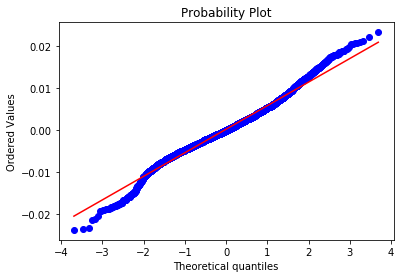

In [54]:
stats.probplot(new_data["ind_412"], dist = "norm", plot=pylab)
pylab.show()

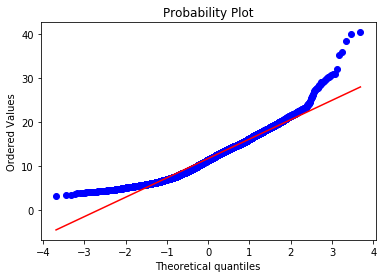

In [55]:
stats.probplot(new_data["ind_17"], dist = "norm", plot=pylab)
pylab.show()

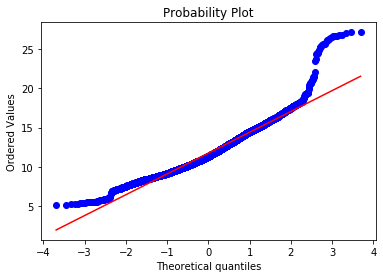

In [56]:
stats.probplot(new_data["ind_18"], dist = "norm", plot=pylab)
pylab.show()

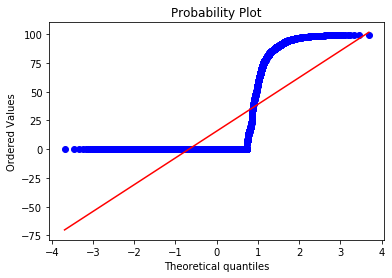

In [57]:
stats.probplot(new_data["ind_332"], dist = "norm", plot=pylab)
pylab.show()

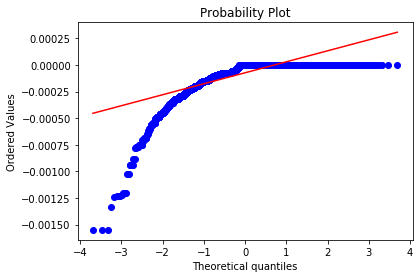

In [58]:
stats.probplot(new_data["ind_324"], dist = "norm", plot=pylab)
pylab.show()

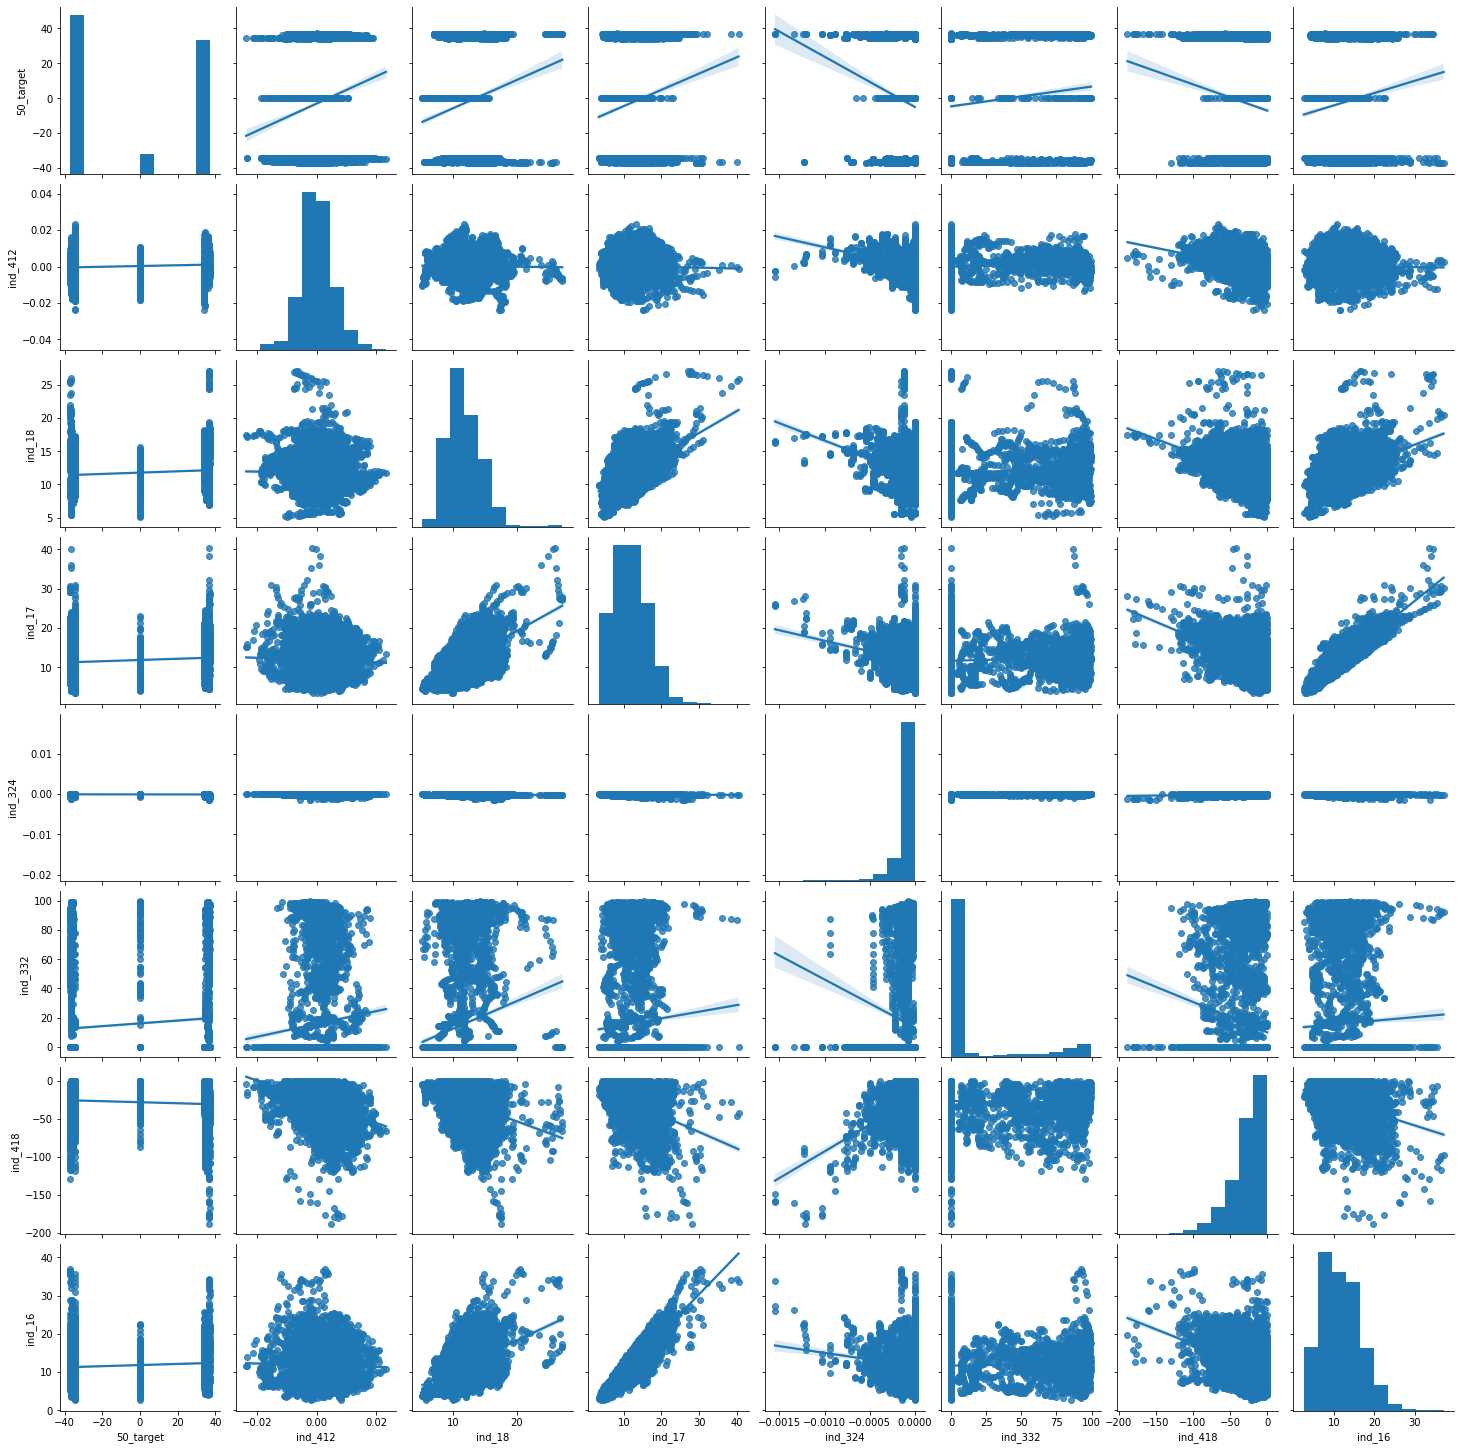

In [59]:
sns.pairplot(new_data,kind="reg")

In [ ]:
class supervised(model):
    def regression():
    def classification():
        
class unsupervised(model):
    def clustering():

class GridsearchCV(): # results of the model 

# Linear Regression

In [6]:
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
import scipy.stats as stats 
import statsmodels.stats.api as sms
import numpy as np 
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

In [7]:
df= pd.read_excel("data.xlsx")

In [19]:
X= df[["ind_412","ind_18","ind_17","ind_324","ind_332","ind_418","ind_16"]]    # bağımlı değişken
X[0:5]

,ind_412,ind_18,ind_17,ind_324,ind_332,ind_418,ind_16
0,0.002371,9.1100,12.060000,-0.000062,20.967742,-54,11.73
1,0.003074,9.2225,11.326667,-0.000062,20.800000,-60,12.22
2,0.003561,9.3125,10.973333,-0.000062,20.634921,-60,12.28
3,0.004366,9.4150,10.426667,-0.000062,20.472441,-65,12.61
4,0.004198,9.8925,11.406667,-0.000062,20.312500,-86,14.25


In [20]:
X=sm.add_constant(X)

In [21]:
y=df[["50_target"]]  # response variable
y[0:5]

,50_target
0,35.625252
1,35.643013
2,35.651301
3,0.000000
4,-35.727079


In [22]:
lm=sm.OLS(y,X)     # Modeli kurma
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              50_target   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     41.75
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           6.97e-58
Time:                        10:46:24   Log-Likelihood:                -30455.
No. Observations:                6167   AIC:                         6.093e+04
Df Residuals:                    6159   BIC:                         6.098e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.0384      1.969    -11.192      0.000     -25.899     -18.178
ind_412      760.3794     84.029      9.049      0.000     595.653     925.106
ind_18         0.8350      0.201      4.149      0.000       0.441       1.230
ind_17         0.8312      0.278      2.994      0.003       0.287       1.376
ind_324    -1.265e+04   3643.516     -3.473      0.001   -1.98e+04   -5512.106
ind_332        0.0827      0.014      5.971      0.000       0.056       0.110
ind_418        0.0499      0.023      2.131      0.033       0.004       0.096
ind_16        -0.1253      0.230     -0.545      0.586      -0.576       0.325
==============================================================================
Omnibus:                    26083.064   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              789.561
Skew:                           0.131   Prob(JB):                    3.54e-172
Kurtosis:                       1.267   Cond. No.                     3.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-22.0384,1.969,-11.192,0.000,-25.899,-18.178
ind_412,760.3794,84.029,9.049,0.000,595.653,925.106
ind_18,0.8350,0.201,4.149,0.000,0.441,1.230
ind_17,0.8312,0.278,2.994,0.003,0.287,1.376
ind_324,-1.265e+04,3643.516,-3.473,0.001,-1.98e+04,-5512.106
ind_332,0.0827,0.014,5.971,0.000,0.056,0.110
ind_418,0.0499,0.023,2.131,0.033,0.004,0.096
ind_16,-0.1253,0.230,-0.545,0.586,-0.576,0.325


In [24]:
model.f_pvalue

6.970686972837003e-58

In [25]:
model.conf_int()

,0,1
const,-25.898562,-18.178221
ind_412,595.653007,925.105854
ind_18,0.440511,1.229546
ind_17,0.286876,1.375514
ind_324,-19797.234248,-5512.105891
ind_332,0.055555,0.109866
ind_418,0.003994,0.095771
ind_16,-0.575981,0.325433


In [26]:
model.fittedvalues[0:5]

0   -4.250667
1   -4.606307
2   -4.475751
3   -4.536794
4   -4.717559
dtype: float64

In [27]:
y[0:5]

,50_target
0,35.625252
1,35.643013
2,35.651301
3,0.000000
4,-35.727079


In [28]:
X['ind_412'][0:5]

0    0.002371
1    0.003074
2    0.003561
3    0.004366
4    0.004198
Name: ind_412, dtype: float64

In [29]:
y_predicted=[]
for i in range(len(y)):
    y_predicted.append(X['ind_412'][i]*float(model.params[1])+float(model.params[0]))

In [30]:
y_predicted[0:5]

[-20.23519358805953,
 -19.700679544608818,
 -19.3304165827376,
 -18.718473101861008,
 -18.846327861611694]

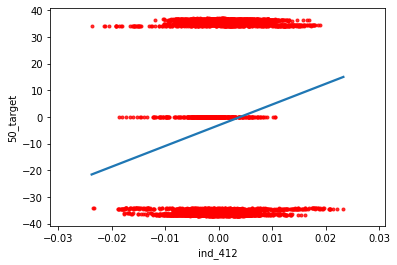

In [31]:
g = sns.regplot(df['ind_412'],df['50_target'], ci=None, scatter_kws={'color':'red','s':9})
g.set_ylabel('50_target')
g.set_xlabel('ind_412')
fig = g.get_figure()
fig.savefig("output.png")

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X = df[['ind_412']]
y= df['50_target']

In [34]:
reg = LinearRegression()
model= reg.fit(X,y)

In [35]:
model.intercept_

-3.0802611305832257

In [36]:
model.coef_[0]

776.9121351827604

In [37]:
model.score(X,y)

0.016188589237305262

In [38]:
prediction=model.predict(X)
prediction[0:10]

array([-1.23785673, -0.69172091, -0.31340743,  0.31184136,  0.18120669,
        1.11100659,  1.38596356,  0.8907419 ,  0.13230473,  0.10143568])

In [39]:
error_df=prediction-y

In [40]:
error_arr=error_df.values

In [41]:
error_df.var()

1175.0429350508957

In [42]:
error_df.abs().mean()

33.103797261077915

In [43]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import numpy as np
import pandas as pd

In [44]:
k_t = pd.DataFrame({'gercek_y':y[0:10],'tahmin_y':reg.predict(X)[0:10]})

In [45]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,35.625252,-1.237857,36.863109
1,35.643013,-0.691721,36.334734
2,35.651301,-0.313407,35.964708
3,0.000000,0.311841,-0.311841
4,-35.727079,0.181207,-35.908286
5,-35.722047,1.111007,-36.833054
6,-35.720567,1.385964,-37.106531
7,-35.712575,0.890742,-36.603317
8,-35.693926,0.132305,-35.826231
9,-35.699550,0.101436,-35.800986


In [46]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,35.625252,-1.237857,36.863109,1358.888798
1,35.643013,-0.691721,36.334734,1320.212866
2,35.651301,-0.313407,35.964708,1293.460248
3,0.000000,0.311841,-0.311841,0.097245
4,-35.727079,0.181207,-35.908286,1289.404996
5,-35.722047,1.111007,-36.833054,1356.673840
6,-35.720567,1.385964,-37.106531,1376.894610
7,-35.712575,0.890742,-36.603317,1339.802790
8,-35.693926,0.132305,-35.826231,1283.518824
9,-35.699550,0.101436,-35.800986,1281.710603


In [47]:
np.sum(k_t["hata_kare"])

11900.664819668971

In [48]:
lm= sm.OLS(y,X) 
model = lm.fit()

In [49]:
influence = model.get_influence()
influence

In [50]:
import seaborn as sns

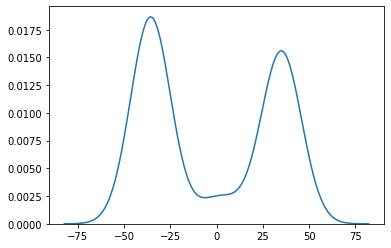

In [51]:
### Residual yani artık değerler için normalite testlerinin yapılması.
#Model residuallarından tahmin ettiklerimizi getirmesini istedik.
advres = pd.concat([df, pd.Series (model.resid, name= 'resid'), pd.Series (model.predict() , name= "predict")] ,axis=1)
sns.kdeplot (np.array (advres.resid), bw=10)


In [52]:
model.resid

0       33.833818
1       33.320552
2       32.960993
3       -3.298259
4      -38.898318
          ...    
6162   -38.036324
6163   -40.967215
6164   -41.247373
6165   -41.351345
6166   -41.144332
Length: 6167, dtype: float64

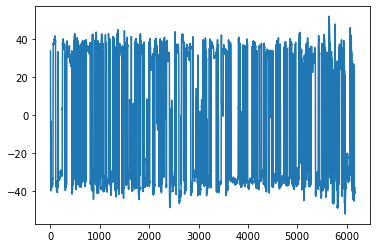

In [53]:
plt.plot(model.resid)

In [54]:
print (np.sum(k_t['hata_kare']))
print (np.mean(k_t['hata_kare']))
print (np.average(((k_t['hata']).abs())))
print (np.sqrt(np.mean(k_t['hata_kare'])))

11900.664819668971
1190.066481966897
32.75527959777645
34.49734021583254


# Principle Component Analysis (PCA)

Modelleme yaparken sürekli bağımsız değişkenlerin sayısını düşürmek amacıyla kullanılır.Özellikle doğrusal modellemede fazla değişken kullanmak tahmin gücünü zayıflatmaktadır.Bunun nedeni değişken sayısı arttıkça bağımsız değişkenler arası korelasyonun yüksek çıkmasıdır.(Multicollinearity)

***PCA ile p tane bağımsız değişken k tane uncorrelated değişkene dönüştürülür.

***Önce correlated veriler datadan elenip kalan verilere PCA yapılabilir.

In [55]:
col=df.columns

num_cols=df._get_numeric_data().columns
cat=set(col)-set(num_cols)
cat

{'ind_109', 'ind_420', 'ind_422'}

In [56]:
df['ind_109'].unique()  #Bu değişkenin kategorik olduğu kanıtlandı.

array(['GREEN', 'RED'], dtype=object)

In [57]:
df["ind_109"].value_counts()

GREEN    3132
RED      3035
Name: ind_109, dtype: int64

In [58]:
cat = df.select_dtypes(include='object')
cat  #ind_109 değişkeni kategorik bir değişkendir.

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388
...,...,...,...
6162,RED,-11,-270
6163,RED,-12,-271
6164,GREEN,-21,-280
6165,GREEN,-33,-292


ind_109 değişkeni object olduğu için numeric hale gelmelidir.Ona PCA yapabiliriz veya datadan atmak gerekir.

ind_420 ve ind_422 değişkeni de object.Datadan atabiliriz.

50_target,90_target ve 20_target target değişkendir.Bunları ve diğer değişkenlerle ilişkisini tahmin etmeye çalışıyoruz.

In [59]:
dms = pd.get_dummies(df[["ind_109", "ind_420", "ind_422"]])
dms.head()

,ind_109_GREEN,ind_109_RED,ind_420_-349,ind_420_-346,ind_420_-340,ind_420_-330,ind_420_-327,ind_420_-326,ind_420_-323,ind_420_-322,...,ind_422_111,ind_422_112,ind_422_113,ind_422_114,ind_422_115,ind_422_117,ind_422_118,ind_422_119,ind_422_124,ind_422_?
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
dms = pd.get_dummies(df[["ind_109", "ind_420", "ind_422"]])
dms.head()
y=df["50_target"]
X=df.drop(["50_target","20_target","90_target","ind_109","ind_420","ind_422"], axis=1 ).astype("float64")
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522


In [61]:
X=df.drop(["50_target","20_target","90_target","ind_109","ind_420","ind_422","ind_5","ind_6","ind_8","ind_10","ind_12","ind_412","ind_414","ind_418","ind_426","ind_428","ind_13","ind_17","ind_18","ind_332","ind_16"], axis=1 ).astype("float64")
X.head()

,ind_9,ind_14,ind_15,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,...,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_416,ind_424
0,85.714286,23.80,17.62,2.0,15.0,13.0,1.0,56.0,0.002690,-0.002670,...,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44.0,-23.0,-27.0,-49.6,1.0
1,78.571429,11.45,18.16,0.0,11.0,11.0,1.0,63.0,0.002729,-0.003111,...,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48.0,-16.0,-31.0,-55.6,1.0
2,71.428571,8.75,17.86,5.0,15.0,9.0,-1.0,65.0,0.002780,-0.003530,...,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48.0,-10.0,-30.0,-58.4,1.0
3,64.285714,7.80,14.76,11.0,18.0,8.0,0.0,68.0,0.002679,-0.003961,...,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51.0,-10.0,-30.0,-61.8,1.0
4,57.142857,14.90,11.92,13.0,23.0,10.0,10.0,91.0,0.003986,-0.004624,...,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70.0,-24.0,-45.0,-79.8,1.0


#Hedef değişkene PCA yapılamadığı için datasetinden çıkarıyoruz.(50_target,20_target,90_target)

#Tüm kategorik verileri dummy aracılığıyla çevirdik.Bunları da veri setinden çıkardık.

#Kalan integer değişkenleri float hale dönüştürdük.

*Ana amaç: *1)Kategorik değişkenler dummy yapılacak. *2)Numerikleri bulmak için hedef değişken ve dummy veri setinden atılır. *3)Sonra dummy yaptıklarımızı numeriklerle birleştirip ana bir x veriseti kuracağız.

In [63]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
training = df.copy()
print("training", training.shape)

#115 tane x'im var.

X_train (4625, 115)
X_test (1542, 115)
y_train (4625,)
y_test (1542,)
training (6167, 136)


In [64]:
pca=PCA()

In [65]:
X_reduced_train= pca.fit_transform(scale(X_train))
#PCA'i fit et içine scale ettiğim x değerlerimi koy. Normalization yapıyorum çünkü birbirine dik olan doğrular bulmaya çalışıyorum.
#Datalarımın aynı scale yani düzlemde oluşu PCA gücünü arttıracaktır.

X_reduced_train[0:1,:]

#Yeni reduced edilmiş bir x datasetim oldu.

array([[ 7.96932443e+00, -4.81854975e+00,  1.17774049e+00,
         6.31341220e-01,  1.59402526e+00, -1.91183075e+00,
        -1.27869946e+00,  9.74204307e-02, -1.79012643e+00,
        -5.76634242e-03,  6.96577448e-01,  9.19502363e-01,
         2.38961998e-01,  2.32030094e-01, -5.65499928e-02,
        -1.51137555e+00,  4.91357500e-01,  1.65060380e+00,
         1.00692342e-01, -9.24737534e-01,  1.04164159e+00,
        -1.09929279e+00, -1.11313175e+00,  7.29350882e-01,
         9.93764245e-02, -8.67607005e-01, -8.42876253e-01,
         5.17964848e-02, -3.39526731e-01,  1.07930461e+00,
        -1.48704387e-01,  4.56951591e-01,  1.02088227e+00,
         6.71938471e-01, -6.14379087e-01,  8.52045398e-01,
         1.40792301e-02, -5.05431152e-01,  3.70227891e-01,
         2.77678837e-01,  2.88773709e-01,  3.53976687e-01,
         8.95638973e-01,  4.04789242e-02,  1.81090571e-02,
         1.73202476e-02, -3.83539380e-01, -2.71042838e-02,
        -1.82059760e-01,  7.92656801e-02,  7.49250708e-0

***Buradaki asıl amacımız; maksimum varyansı sağlayan yani datanın içindeki maksimum açıklayıcılığı bulabildiğimiz component sayısını belirlemek.

In [66]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
#explained variance: PCA yaptığım datamın içinde ,her bir component da datamın ne kadar açıkladığını bize gösterir.

array([ 36.35,  49.49,  55.83,  59.53,  62.83,  65.86,  68.82,  70.98,
        72.82,  74.51,  76.13,  77.69,  79.13,  80.46,  81.72,  82.9 ,
        83.94,  84.91,  85.8 ,  86.67,  87.46,  88.22,  88.92,  89.58,
        90.21,  90.8 ,  91.35,  91.88,  92.36,  92.84,  93.31,  93.73,
        94.12,  94.48,  94.82,  95.14,  95.45,  95.72,  95.97,  96.21,
        96.43,  96.65,  96.86,  97.06,  97.24,  97.41,  97.58,  97.74,
        97.88,  98.02,  98.15,  98.27,  98.38,  98.48,  98.58,  98.67,
        98.76,  98.85,  98.93,  99.01,  99.08,  99.15,  99.21,  99.27,
        99.32,  99.37,  99.42,  99.46,  99.5 ,  99.54,  99.58,  99.62,
        99.66,  99.69,  99.72,  99.75,  99.78,  99.8 ,  99.82,  99.84,
        99.86,  99.88,  99.89,  99.9 ,  99.91,  99.92,  99.93,  99.94,
        99.95,  99.96,  99.97,  99.98,  99.99, 100.  , 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
       100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01, 100.01,
      

#Bunu şu şekilde yorumlayabiliriz: *İlk component verisetimin %36.3 ünü açıklar, ikinci component %50 sini açıklar.Burada sondaki componentlar veriyi çok iyi açıklıyor.Neredeyse %100 oranında. ???

In [67]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([36.35, 49.49, 55.83, 59.53, 62.83])

#1.component verisetinde bulunan varyansın %37 sini açıklıyor.

#2.component birinci ile birlikte verisetinde bulunan varyansın %50 sini açıklıyor.

([<matplotlib.axis.XTick at 0x24005ce4308>,
 <a list of 115 Text xticklabel objects>)

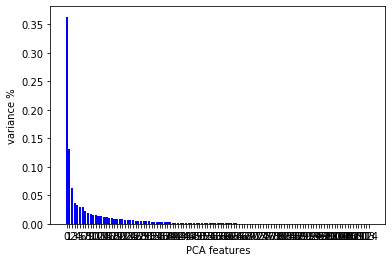

In [70]:
import matplotlib.pyplot as plt

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)


In [ ]:
def pca_fon(X, threshold):   #Datamın yüzde 70 oranında açıklayıcılığı olmasını istersem,kaç component kullanmam gerektiğini gösteren kod.
    pca = PCA()
    X_pca = pca.fit_transform(scale(X))
    arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    num_var = sum((arr < threshold*100)) + 1 
    print('pca sonrası değişken sayısı: ',num_var)
    X_pcad = pd.DataFrame(X_pca[:,0:num_var], index = X.index)
    return X_pcad

df_pca=pca_fon(df, 0.70)

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
lm = LinearRegression()
pca.n_components_

115

In [75]:
regression = lm.fit(X_reduced_train,y_train)

In [76]:
y_pred = regression.predict(X_reduced_train)

In [77]:
rscore =[]
RMSE = []
for i in range (1,115):
    pca = PCA(n_components = i)
    X_reduced_train = pca.fit_transform(scale(X_train))
    lm = LinearRegression()
    regression = lm.fit(X_reduced_train,y_train)
    y_pred = regression.predict(X_reduced_train)
    rscore.append(r2_score(y_train, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_train,y_pred)))

Text(0.5, 0, 'Component Sayısı')

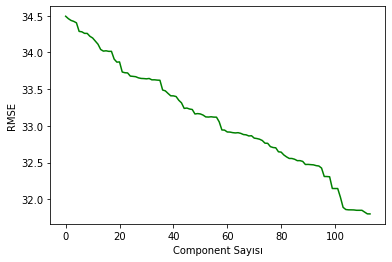

In [106]:
plt.plot(RMSE,color="green")
plt.ylabel('RMSE')
plt.xlabel("Component Sayısı")

Text(0.5, 0, 'Component Sayısı')

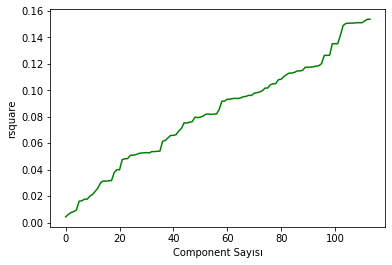

In [107]:
plt.plot(rscore,color="green")
plt.ylabel('rsquare')
plt.xlabel("Component Sayısı")

# Train Datası

In [81]:
pca = PCA(n_components = 110)
X_reduced_train = pca.fit_transform(scale(X_train))
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train,y_train)

In [82]:
pcr_model.intercept_

-2.911841468918921

In [83]:
pcr_model.coef_  #Her bir component değerim yani 1.component=-0.34 gibi.

array([-3.48483833e-01,  3.88735326e-01,  4.77126867e-01,  4.56972666e-01,
       -5.96994753e-01, -1.51699629e+00,  3.36726187e-01,  7.61786434e-01,
        1.55059062e-01,  1.18419774e+00,  8.94075363e-01, -1.22282332e+00,
       -1.36601651e+00,  1.84149439e+00,  8.26505102e-01, -5.41517944e-01,
        2.62070583e-01, -8.90638175e-02, -2.60113170e+00,  1.75580085e+00,
       -3.04061054e-01, -3.19130002e+00, -1.02737238e+00,  7.78700178e-01,
       -1.98000704e+00,  2.90696898e-01,  6.92819459e-01,  1.31981041e+00,
       -9.38291719e-01, -8.21355287e-03, -7.24920888e-01,  1.16854038e-01,
       -1.33665459e+00,  4.25566779e-01,  9.20591189e-01,  4.79094256e-01,
        5.17274300e+00,  1.84152155e+00,  2.36604240e+00,  2.78108294e+00,
        1.10467351e-01, -4.56032073e-01,  4.04527022e+00,  3.17152802e+00,
        4.74154573e+00,  1.34009676e+00, -1.84251357e+00, -1.63036741e+00,
       -4.71410367e+00,  1.15133250e+00,  1.08751601e+00, -2.55793528e+00,
        3.68957358e+00,  

#1.component 1 arttığında 50_target 3.48 düşüyor.

#2.component 1 arttığında 50_target 3.88 artıyor.

#Prediction yapıyorsam PCA kullanmak mantıklı ama modeldeki x değerlerini tek tek açıklayacaksak black box kullanmalıyız.PCA yetersiz kalabilir.

In [84]:
y_pred = pcr_model.predict(X_reduced_train) 
y_pred[0:110]

#PCA den çıkan x değerlerimi y değerine predict ediyorum.50_target değerini tahmin ediyorum.

array([ 1.59123266e+00,  7.44869196e-01,  1.12915229e+01, -3.73042462e+00,
        4.66763047e+00, -1.91569787e+01,  1.80593609e+01, -2.50220115e+01,
       -1.88231092e+01,  2.71324177e+01,  1.08819860e+01,  5.81330917e+00,
        2.35620427e+01, -1.45775898e+01, -7.24118064e+00,  1.53422622e+01,
        1.55252949e+00,  8.60473920e+00, -1.57796431e+01, -5.86966569e+00,
       -9.82714195e+00, -1.59029646e+01,  1.34780952e+01,  7.18603760e+00,
       -2.29124927e+01, -7.18187765e+00, -7.45566862e+00,  3.11646236e+00,
       -4.26374495e+00,  1.74028496e+01,  3.15222574e+00, -3.57631952e-02,
       -1.83306050e+01,  2.46427277e+00,  8.42086597e+00, -1.54548020e+01,
        7.73230934e+00, -6.35918132e+00,  6.49199439e+00, -1.31552376e+01,
        4.68650501e+00,  3.94055623e-01, -6.05776499e+00, -5.88984604e+00,
       -4.30094011e+00, -2.85403578e+00, -1.95478030e+01,  1.10873160e+01,
       -2.19983034e+01, -2.71745068e+00,  8.49328287e+00, -1.00968048e+01,
        3.23294480e+00, -

In [85]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_train,y_pred))

31.848623803253524

In [86]:
r2_score(y_train,y_pred)  #Modelin r2 değerine baktığımızda ,açıklayıcılığı düşüktür.

0.1511165058814159

In [87]:
df["50_target"].mean()

-2.9063582899740608

# Test Datası

In [89]:
pca2 = PCA(n_components=110)

X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)

np.sqrt(mean_squared_error(y_test,y_pred))

37.40686667464177

In [109]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:110] ,y_train)
pcr_model.intercept_
pcr_model.coef_

array([-3.48483833e-01,  3.88735326e-01,  4.77126867e-01,  4.56972666e-01,
       -5.96994753e-01, -1.51699629e+00,  3.36726187e-01,  7.61786434e-01,
        1.55059062e-01,  1.18419774e+00,  8.94075363e-01, -1.22282332e+00,
       -1.36601651e+00,  1.84149439e+00,  8.26505102e-01, -5.41517944e-01,
        2.62070583e-01, -8.90638175e-02, -2.60113170e+00,  1.75580085e+00,
       -3.04061054e-01, -3.19130002e+00, -1.02737238e+00,  7.78700178e-01,
       -1.98000704e+00,  2.90696898e-01,  6.92819459e-01,  1.31981041e+00,
       -9.38291719e-01, -8.21355287e-03, -7.24920888e-01,  1.16854038e-01,
       -1.33665459e+00,  4.25566779e-01,  9.20591189e-01,  4.79094256e-01,
        5.17274300e+00,  1.84152155e+00,  2.36604240e+00,  2.78108294e+00,
        1.10467351e-01, -4.56032073e-01,  4.04527022e+00,  3.17152802e+00,
        4.74154573e+00,  1.34009676e+00, -1.84251357e+00, -1.63036741e+00,
       -4.71410367e+00,  1.15133250e+00,  1.08751601e+00, -2.55793528e+00,
        3.68957358e+00,  

In [91]:
y_pred = pcr_model.predict(X_reduced_train[:,0:110])
print(np.sqrt(mean_squared_error(y_train,y_pred)))

31.848623803253524


Text(0, 0.5, 'PCA 2')

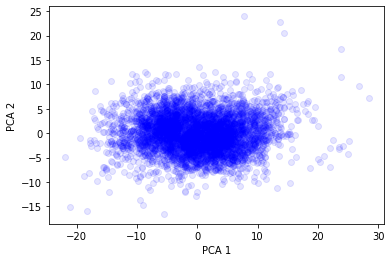

In [92]:
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0], PCA_components[1] , alpha=.1,color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

****Normalize edilmiş X değerlerimle,componentlara baktık.Burada 2 tane component değerine göre datamın dağılımna baktık.Bu bize şunu gösterir:Datamızda farklı componentlara bakarak datadaki kümelenmeleri görmemizi sağlar.Genelde en çok etkileyen componentlar seçilir.

# Tahmin & Model Tuning

In [110]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:110], y_train)

y_pred = pcr_model.predict(X_reduced_test[:,0:110])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

# Modelleme için 10 bileşen alındı. 10 yerine farklı bir rakam alınsaydı mse degeri degişecekti.

37.40686667464177


In [112]:
from sklearn import model_selection

In [113]:
cv_10 = model_selection.KFold(n_splits = 110,
                             shuffle = True,
                             random_state = 1)

In [114]:
RMSE = []

In [115]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

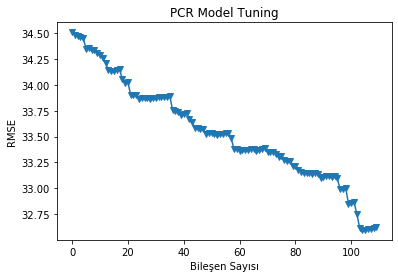

In [116]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning');

In [94]:
lm = LinearRegression()

In [95]:
pcr_model = lm.fit(X_reduced_train[:,0:110], y_train)

In [96]:
y_pred = pcr_model.predict(X_reduced_train[:,0:110])

In [97]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

31.848623803253524


In [98]:
y_pred = pcr_model.predict(X_reduced_test[:,0:110])

In [99]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

37.40686667464177


In [104]:
lm=sm.OLS(y_train,X_reduced_train)     # Modeli kurma
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.150
Model:                            OLS   Adj. R-squared (uncentered):              0.129
Method:                 Least Squares   F-statistic:                              7.246
Date:                Fri, 07 Aug 2020   Prob (F-statistic):                    1.58e-94
Time:                        10:58:26   Log-Likelihood:                         -22589.
No. Observations:                4625   AIC:                                  4.540e+04
Df Residuals:                    4515   BIC:                                  4.611e+04
Df Model:                         110                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3485      0.074     -4.734      0.000      -0.493      -0.204
x2             0.3887      0.122      3.175      0.002       0.149       0.629
x3             0.4771      0.176      2.707      0.007       0.132       0.823
x4             0.4570      0.231      1.980      0.048       0.004       0.909
x5            -0.5970      0.244     -2.442      0.015      -1.076      -0.118
x6            -1.5170      0.255     -5.951      0.000      -2.017      -1.017
x7             0.3367      0.258      1.306      0.192      -0.169       0.842
x8             0.7618      0.302      2.522      0.012       0.170       1.354
x9             0.1551      0.327      0.474      0.636      -0.487       0.797
x10            1.1842      0.341      3.470      0.001       0.515       1.853
x11            0.8941      0.348      2.568      0.010       0.211       1.577
x12           -1.2228      0.355     -3.440      0.001      -1.920      -0.526
x13           -1.3660      0.369     -3.699      0.000      -2.090      -0.642
x14            1.8415      0.384      4.793      0.000       1.088       2.595
x15            0.8265      0.396      2.088      0.037       0.050       1.603
x16           -0.5415      0.408     -1.326      0.185      -1.342       0.259
x17            0.2621      0.435      0.602      0.547      -0.591       1.115
x18           -0.0891      0.450     -0.198      0.843      -0.972       0.794
x19           -2.6011      0.470     -5.533      0.000      -3.523      -1.679
x20            1.7558      0.476      3.685      0.000       0.822       2.690
x21           -0.3041      0.500     -0.608      0.543      -1.284       0.676
x22           -3.1913      0.509     -6.273      0.000      -4.189      -2.194
x23           -1.0274      0.531     -1.935      0.053      -2.068       0.013
x24            0.7787      0.546      1.427      0.154      -0.291       1.848
x25           -1.9800      0.561     -3.527      0.000      -3.081      -0.879
x26            0.2907      0.577      0.504      0.614      -0.841       1.422
x27            0.6928      0.597      1.161      0.246      -0.477       1.863
x28            1.3198      0.611      2.161      0.031       0.122       2.517
x29           -0.9383      0.637     -1.472      0.141      -2.188       0.311
x30           -0.0082      0.641     -0.013      0.990      -1.265       1.249
x31           -0.7249      0.650     -1.115      0.265      -1.999       0.550
x32            0.1169      0.683      0.171      0.864      -1.223       1.457
x33           -1.3367      0.714     -1.873      0.061      -2.735       0.062
x34            0.4256      0.738      0.576      0.564      -1.022       1.873
x35            0.9206      0.763      1.207      0.228      -

In [105]:
lm=sm.OLS(y_test,X_test)     # Modeli kurma
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              50_target   R-squared (uncentered):                   0.179
Model:                            OLS   Adj. R-squared (uncentered):              0.113
Method:                 Least Squares   F-statistic:                              2.708
Date:                Fri, 07 Aug 2020   Prob (F-statistic):                    1.89e-17
Time:                        10:58:55   Log-Likelihood:                         -7502.5
No. Observations:                1542   AIC:                                  1.523e+04
Df Residuals:                    1427   BIC:                                  1.585e+04
Df Model:                         115                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_9          0.0523      0.042      1.231      0.218      -0.031       0.136
ind_14        -0.3063      0.304     -1.007      0.314      -0.903       0.290
ind_15         0.6251      0.390      1.604      0.109      -0.139       1.390
ind_19        -2.1179      2.279     -0.929      0.353      -6.588       2.352
ind_20         1.9190      1.906      1.007      0.314      -1.820       5.658
ind_21        -0.9273      2.321     -0.400      0.690      -5.481       3.626
ind_22         0.3137      0.605      0.518      0.604      -0.873       1.501
ind_23         0.3901      0.605      0.645      0.519      -0.796       1.577
ind_25     -1.529e+06   1.86e+06     -0.824      0.410   -5.17e+06    2.11e+06
ind_26     -1.529e+06   1.86e+06     -0.824      0.410   -5.17e+06    2.11e+06
ind_27      3.049e+06   3.71e+06      0.821      0.412   -4.23e+06    1.03e+07
ind_28        -0.0211      0.022     -0.982      0.326      -0.063       0.021
ind_29        -0.0257      0.034     -0.749      0.454      -0.093       0.042
ind_30         0.0014      0.037      0.037      0.971      -0.071       0.073
ind_31         0.0335      0.050      0.666      0.506      -0.065       0.132
ind_32         0.0360      0.047      0.759      0.448      -0.057       0.129
ind_33        -0.0019      0.045     -0.043      0.966      -0.090       0.086
ind_34         0.0029      0.053      0.054      0.957      -0.100       0.106
ind_35        -0.0157      0.042     -0.375      0.708      -0.098       0.067
ind_36        -0.0212      0.030     -0.699      0.485      -0.081       0.038
ind_37         0.1244      0.030      4.121      0.000       0.065       0.184
ind_39        -0.2057      0.146     -1.408      0.159      -0.492       0.081
ind_40        -1.8058      2.267     -0.797      0.426      -6.253       2.641
ind_41         0.0800      0.131      0.611      0.541      -0.177       0.337
ind_42        -0.4958      0.675     -0.735      0.463      -1.820       0.828
ind_43        -0.3263      0.457     -0.714      0.475      -1.223       0.570
ind_44         0.3605      0.485      0.744      0.457      -0.590       1.311
ind_45         0.0735      0.478      0.154      0.878      -0.863       1.010
ind_46        -0.0441      0.423     -0.104      0.917      -0.874       0.786
ind_47         0.4992      0.326      1.531      0.126      -0.140       1.139
ind_48         0.2790      0.326      0.855      0.393      -0.361       0.919
ind_49        -0.2541      0.267     -0.950      0.342      -0.779       0.270
ind_50         0.9806      0.223      4.395      0.000       0.543       1.418
ind_51        -0.1932      0.158     -1.226      0.221      -0.502       0.116
ind_52        -0.0907      0.810     -0.112      0.911      -